In [251]:
import sympy as sp
import numpy as np

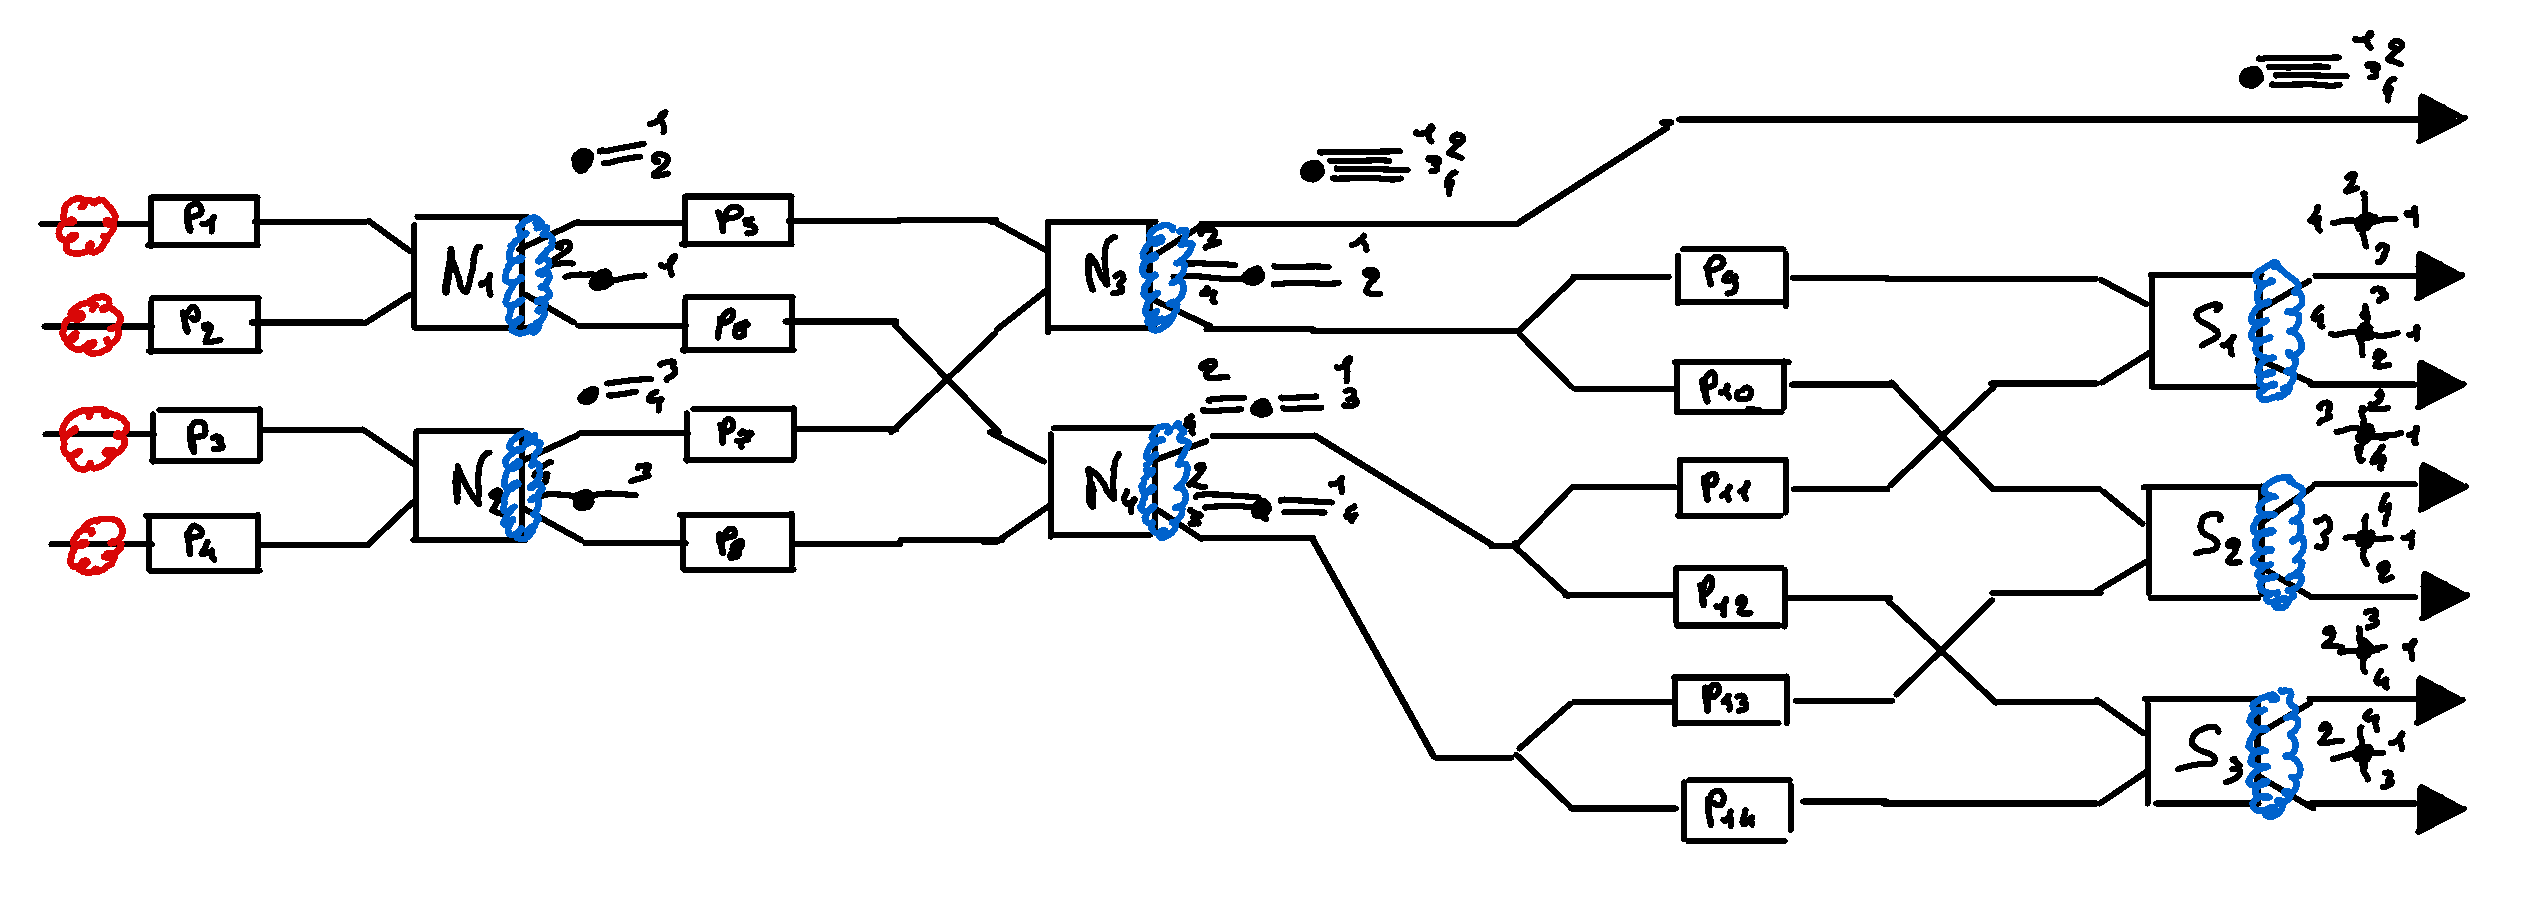

In [252]:
p = sp.IndexedBase('p') # perturbation + correction

o = sp.symbols('o', cls=sp.Idx) # origin (source) of the signal/aberation
n = sp.symbols('n', cls=sp.Idx) # channel number

theta = sp.symbols(r'\theta', real=True) # angle of the source

<div align=center>

---

# INPUT

</div>

4 input beams

In [254]:
x = sp.IndexedBase('x') # input signal
X = sp.Matrix([
    [x[1]],
    [x[2]],
    [x[3]],
    [x[4]]
])
X

Matrix([
[x[1]],
[x[2]],
[x[3]],
[x[4]]])

Atmospherical perturbation

In [255]:
p_1_4 = sp.Matrix([
    [sp.exp(sp.I * p['i',1]), 0, 0, 0],
    [0, sp.exp(sp.I * p['i',2]), 0, 0],
    [0, 0, sp.exp(sp.I * p['i',3]), 0],
    [0, 0, 0, sp.exp(sp.I * p['i',4])]
])
p_1_4

Matrix([
[exp(I*p[i, 1]),              0,              0,              0],
[             0, exp(I*p[i, 2]),              0,              0],
[             0,              0, exp(I*p[i, 3]),              0],
[             0,              0,              0, exp(I*p[i, 4])]])

In [256]:
I = p_1_4

<div align=center>

---

# NULLER

</div>

## First Layer

In [257]:
Nlayer = 1/sp.sqrt(2) * sp.Matrix([
    [1,  1,  0,  0],
    [1, -1,  0,  0],
    [0,  0,  1,  1],
    [0,  0,  1, -1]
])
Nlayer

Matrix([
[sqrt(2)/2,  sqrt(2)/2,         0,          0],
[sqrt(2)/2, -sqrt(2)/2,         0,          0],
[        0,          0, sqrt(2)/2,  sqrt(2)/2],
[        0,          0, sqrt(2)/2, -sqrt(2)/2]])

Check if the nuller is physical

In [258]:
sp.conjugate(Nlayer).T * Nlayer

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

First layer nuller perturbations

In [259]:
p_5_8 = sp.Matrix([
    [sp.exp(sp.I * p['i',5]), 0, 0, 0],
    [0, sp.exp(sp.I * p['i',6]), 0, 0],
    [0, 0, sp.exp(sp.I * p['i',7]), 0],
    [0, 0, 0, sp.exp(sp.I * p['i',8])]
])
p_5_8

Matrix([
[exp(I*p[i, 5]),              0,              0,              0],
[             0, exp(I*p[i, 6]),              0,              0],
[             0,              0, exp(I*p[i, 7]),              0],
[             0,              0,              0, exp(I*p[i, 8])]])

## Second layer

Channel 2 & 3 invertion

In [260]:
invert_2_3 = sp.Matrix([
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1]
])

Overall nuller without perturbations

In [261]:
Nideal = Nlayer * invert_2_3 * Nlayer
Nideal

Matrix([
[1/2,  1/2,  1/2,  1/2],
[1/2,  1/2, -1/2, -1/2],
[1/2, -1/2,  1/2, -1/2],
[1/2, -1/2, -1/2,  1/2]])

In [262]:
sp.conjugate(Nideal).T * Nideal

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

Overall Nuller with perturbations

In [263]:
N = Nlayer * invert_2_3 * p_5_8 * Nlayer
N

Matrix([
[exp(I*p[i, 5])/2,  exp(I*p[i, 5])/2,  exp(I*p[i, 7])/2,  exp(I*p[i, 7])/2],
[exp(I*p[i, 5])/2,  exp(I*p[i, 5])/2, -exp(I*p[i, 7])/2, -exp(I*p[i, 7])/2],
[exp(I*p[i, 6])/2, -exp(I*p[i, 6])/2,  exp(I*p[i, 8])/2, -exp(I*p[i, 8])/2],
[exp(I*p[i, 6])/2, -exp(I*p[i, 6])/2, -exp(I*p[i, 8])/2,  exp(I*p[i, 8])/2]])

<div align=center>

---

# SPLIT & MIX

</div>

Beam splitters

In [264]:
splitters = 1/sp.sqrt(2) * sp.Matrix([
    [sp.sqrt(2), 0, 0, 0],
    [0, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
])
splitters

Matrix([
[1,         0,         0,         0],
[0, sqrt(2)/2,         0,         0],
[0, sqrt(2)/2,         0,         0],
[0,         0, sqrt(2)/2,         0],
[0,         0, sqrt(2)/2,         0],
[0,         0,         0, sqrt(2)/2],
[0,         0,         0, sqrt(2)/2]])

In [265]:
sp.conjugate(splitters).T * splitters

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

2-3 and 4-5 invertion

In [266]:
invert_23_45 = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1]
])
invert_23_45

Matrix([
[1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 1]])

In [267]:
sp.conjugate(invert_23_45).T * invert_23_45

Matrix([
[1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1]])

Split & Mix

In [268]:
theta = sp.pi / 2
Slayer = 1/sp.sqrt(2) * sp.Matrix([
    [sp.sqrt(2), 0, 0, 0, 0, 0, 0],
    [0, sp.exp(sp.I * theta/2), 0, sp.exp(-sp.I * theta/2), 0, 0, 0],
    [0, sp.exp(-sp.I * theta/2), 0, sp.exp(sp.I * theta/2), 0, 0, 0],
    [0, 0, sp.exp(sp.I * theta/2), 0, 0, sp.exp(-sp.I * theta/2), 0],
    [0, 0, sp.exp(-sp.I * theta/2), 0, 0, sp.exp(sp.I * theta/2), 0],
    [0, 0, 0, 0, sp.exp(sp.I * theta/2), 0, sp.exp(-sp.I * theta/2)],
    [0, 0, 0, 0, sp.exp(-sp.I * theta/2), 0, sp.exp(sp.I * theta/2)]
])
Slayer

Matrix([
[1,                      0,                      0,                      0,                      0,                      0,                      0],
[0,  sqrt(2)*exp(I*pi/4)/2,                      0, sqrt(2)*exp(-I*pi/4)/2,                      0,                      0,                      0],
[0, sqrt(2)*exp(-I*pi/4)/2,                      0,  sqrt(2)*exp(I*pi/4)/2,                      0,                      0,                      0],
[0,                      0,  sqrt(2)*exp(I*pi/4)/2,                      0,                      0, sqrt(2)*exp(-I*pi/4)/2,                      0],
[0,                      0, sqrt(2)*exp(-I*pi/4)/2,                      0,                      0,  sqrt(2)*exp(I*pi/4)/2,                      0],
[0,                      0,                      0,                      0,  sqrt(2)*exp(I*pi/4)/2,                      0, sqrt(2)*exp(-I*pi/4)/2],
[0,                      0,                      0,                      0, sqrt(2)*exp(-I*pi/4)/

In [269]:
sp.conjugate(Slayer).T * Slayer

Matrix([
[1,                  0,                  0,                  0,                  0,                  0,                  0],
[0,                  1,                  0, (1/2)*(-1)*I + I/2,                  0,                  0,                  0],
[0,                  0,                  1,                  0,                  0, (1/2)*(-1)*I + I/2,                  0],
[0, (1/2)*(-1)*I + I/2,                  0,                  1,                  0,                  0,                  0],
[0,                  0,                  0,                  0,                  1,                  0, (1/2)*(-1)*I + I/2],
[0,                  0, (1/2)*(-1)*I + I/2,                  0,                  0,                  1,                  0],
[0,                  0,                  0,                  0, (1/2)*(-1)*I + I/2,                  0,                  1]])

N'est physique que si $\theta = \frac{\pi}{2} (n+1) \rightarrow cos(\theta)=0$

In [270]:
Sideal = Slayer * invert_23_45 * splitters
Sideal

Matrix([
[1,                              0,                              0,                              0],
[0, exp(-I*pi/4)/2 + exp(I*pi/4)/2,                              0,                              0],
[0, exp(-I*pi/4)/2 + exp(I*pi/4)/2,                              0,                              0],
[0,                              0, exp(-I*pi/4)/2 + exp(I*pi/4)/2,                              0],
[0,                              0, exp(-I*pi/4)/2 + exp(I*pi/4)/2,                              0],
[0,                              0,                              0, exp(-I*pi/4)/2 + exp(I*pi/4)/2],
[0,                              0,                              0, exp(-I*pi/4)/2 + exp(I*pi/4)/2]])

In [271]:
sp.conjugate(Sideal).T * Sideal

Matrix([
[1,                                     0,                                     0,                                     0],
[0, 2*(exp(-I*pi/4)/2 + exp(I*pi/4)/2)**2,                                     0,                                     0],
[0,                                     0, 2*(exp(-I*pi/4)/2 + exp(I*pi/4)/2)**2,                                     0],
[0,                                     0,                                     0, 2*(exp(-I*pi/4)/2 + exp(I*pi/4)/2)**2]])

\begin{equation}
\begin{split}
\eta &= 2 \left(\frac{1}{2} + \frac{e^{-i\theta}}{2}\right)\left(\frac{e^{i\theta}}{2} + \frac{1}{2} \right) \\
&= 2 * \left(\frac{e^{i\theta}}{4} + \frac{1}{4} + \frac{e^{-i\theta}}{4} + \frac{1}{4} \right) \\
&= \frac{1}{2} \left(2 + e^{i\theta} + e^{-i\theta} \right) \\
&= \frac{1}{2} \left(2 + 2 cos(\theta)\right) \\
&= 1 + cos(\theta)
\end{split}
\end{equation}

As the previous one, this matrix is then physical only if $\theta = \frac{\pi}{2} (n+1) \rightarrow cos(\theta)=0$

In [272]:
p_9_14 = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, sp.exp(sp.I * p['i',9]), 0, 0, 0, 0, 0],
    [0, 0, sp.exp(sp.I * p['i',10]), 0, 0, 0, 0],
    [0, 0, 0, sp.exp(sp.I * p['i',11]), 0, 0, 0],
    [0, 0, 0, 0, sp.exp(sp.I * p['i',12]), 0, 0],
    [0, 0, 0, 0, 0, sp.exp(sp.I * p['i',13]), 0],
    [0, 0, 0, 0, 0, 0, sp.exp(sp.I * p['i',14])],
])
p_9_14

Matrix([
[1,              0,               0,               0,               0,               0,               0],
[0, exp(I*p[i, 9]),               0,               0,               0,               0,               0],
[0,              0, exp(I*p[i, 10]),               0,               0,               0,               0],
[0,              0,               0, exp(I*p[i, 11]),               0,               0,               0],
[0,              0,               0,               0, exp(I*p[i, 12]),               0,               0],
[0,              0,               0,               0,               0, exp(I*p[i, 13]),               0],
[0,              0,               0,               0,               0,               0, exp(I*p[i, 14])]])

In [273]:
S = p_9_14 * Sideal
S

Matrix([
[1,                                                0,                                                0,                                                0],
[0,  (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 9]),                                                0,                                                0],
[0, (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 10]),                                                0,                                                0],
[0,                                                0, (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 11]),                                                0],
[0,                                                0, (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 12]),                                                0],
[0,                                                0,                                                0, (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 13])],
[0,                                                0,        

<div align=center>

---

# KERNEL

</div>

In [274]:
K = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1,-1, 0, 0, 0, 0],
    [0, 0, 0, 1,-1, 0, 0],
    [0, 0, 0, 0, 0, 1,-1],
])
K

Matrix([
[1, 0,  0, 0,  0, 0,  0],
[0, 1, -1, 0,  0, 0,  0],
[0, 0,  0, 1, -1, 0,  0],
[0, 0,  0, 0,  0, 1, -1]])

As the kernel creation process is fully numeric, there is no need to check if it is physical or not.

<div align=center>

---

# OVERALL MATRIX

</div>

## Ideal

Matrix

In [275]:
Mideal = Sideal * Nideal
Mideal

Matrix([
[                           1/2,                             1/2,                             1/2,                             1/2],
[exp(-I*pi/4)/4 + exp(I*pi/4)/4,  exp(-I*pi/4)/4 + exp(I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4],
[exp(-I*pi/4)/4 + exp(I*pi/4)/4,  exp(-I*pi/4)/4 + exp(I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4],
[exp(-I*pi/4)/4 + exp(I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4,  exp(-I*pi/4)/4 + exp(I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4],
[exp(-I*pi/4)/4 + exp(I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4,  exp(-I*pi/4)/4 + exp(I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4],
[exp(-I*pi/4)/4 + exp(I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4,  exp(-I*pi/4)/4 + exp(I*pi/4)/4],
[exp(-I*pi/4)/4 + exp(I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4, -exp(I*pi/4)/4 - exp(-I*pi/4)/4,  exp(-I*pi/4)/4 + exp(I*pi/4)/4]])

Transfer functions

In [276]:
Mideal * X

Matrix([
[                                                                                                                              x[1]/2 + x[2]/2 + x[3]/2 + x[4]/2],
[(exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[1] + (exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[2] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[3] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[4]],
[(exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[1] + (exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[2] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[3] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[4]],
[(exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[1] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[2] + (exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[3] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[4]],
[(exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[1] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[2] + (exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[3] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[4]],
[(exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[1] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[2] + (-exp(I*pi/4)/4 - exp(-I*pi/4)/4)*x[3] + (exp(-I*pi/4)/4 + exp(I*pi/4)/4)*x[4]],
[(exp(-I*pi/4

## With weights & perturbations

Matrix

In [277]:
M = S * N * I
M

Matrix([
[                                                 exp(I*p[i, 1])*exp(I*p[i, 5])/2,                                                   exp(I*p[i, 2])*exp(I*p[i, 5])/2,                                                   exp(I*p[i, 3])*exp(I*p[i, 7])/2,                                                   exp(I*p[i, 4])*exp(I*p[i, 7])/2],
[ (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 1])*exp(I*p[i, 5])*exp(I*p[i, 9])/2,   (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 2])*exp(I*p[i, 5])*exp(I*p[i, 9])/2,  -(exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 3])*exp(I*p[i, 7])*exp(I*p[i, 9])/2,  -(exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 4])*exp(I*p[i, 7])*exp(I*p[i, 9])/2],
[(exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 10])*exp(I*p[i, 1])*exp(I*p[i, 5])/2,  (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 10])*exp(I*p[i, 2])*exp(I*p[i, 5])/2, -(exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 10])*exp(I*p[i, 3])*exp(I*p[i, 7])/2, -(exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 10])*exp(I*p[i, 4])*exp(I*p[i, 

Transfer functions

In [278]:
M * X

Matrix([
[                                                                                                                                                                                                    exp(I*p[i, 1])*exp(I*p[i, 5])*x[1]/2 + exp(I*p[i, 2])*exp(I*p[i, 5])*x[2]/2 + exp(I*p[i, 3])*exp(I*p[i, 7])*x[3]/2 + exp(I*p[i, 4])*exp(I*p[i, 7])*x[4]/2],
[    (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 1])*exp(I*p[i, 5])*exp(I*p[i, 9])*x[1]/2 + (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 2])*exp(I*p[i, 5])*exp(I*p[i, 9])*x[2]/2 - (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 3])*exp(I*p[i, 7])*exp(I*p[i, 9])*x[3]/2 - (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 4])*exp(I*p[i, 7])*exp(I*p[i, 9])*x[4]/2],
[(exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 10])*exp(I*p[i, 1])*exp(I*p[i, 5])*x[1]/2 + (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 10])*exp(I*p[i, 2])*exp(I*p[i, 5])*x[2]/2 - (exp(-I*pi/4)/2 + exp(I*pi/4)/2)*exp(I*p[i, 10])*exp(I*p[i, 3])*exp(I*p[i, 7])*x[3]/2 - (exp(-I*pi/4)/2 + ex